<a href="https://colab.research.google.com/github/juand4g/MetodosComputacionales2-G02/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rhodium.csv')
data

,Wavelength (pm),Intensity (mJy)
0,10.2419,0.0001
1,10.4837,0.0001
2,10.7256,0.0001
3,10.9675,0.0001
4,11.2093,0.0001
...,...,...
1194,299.0325,0.0036
1195,299.2744,0.0248
1196,299.5163,0.0035
1197,299.7581,0.0037


<Axes: title={'center': 'Intensity (mJy)'}, xlabel='Wavelenght (pm)'>

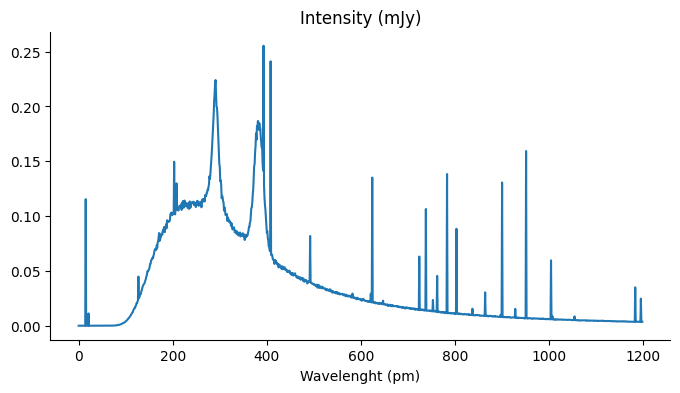

In [ ]:
graph1 = data['Intensity (mJy)'].plot(kind='line', figsize=(8, 4), title='Intensity (mJy)', xlabel="Wavelenght (pm)")
plt.gca().spines[['top', 'right']].set_visible(False)
graph1

In [ ]:
prom_dx = 0
n = len(data["Intensity (mJy)"])
i = 0
while i < n-1:
  intensity = data["Intensity (mJy)"][i]
  intensity_next = data["Intensity (mJy)"][i+1]
  dx = abs(intensity - intensity_next)
  prom_dx += dx
  i += 1
prom_dx = prom_dx/n



In [ ]:
data2 = data.copy()
j = 0
n_eliminados = 0
tol = 4.4
while j < n-1:
  intensity = data2["Intensity (mJy)"][j]
  intensity_next = data2["Intensity (mJy)"][j+1]
  dx = abs(intensity - intensity_next)
  if dx > tol*prom_dx:
    data2["Intensity (mJy)"][j+1] = intensity
    n_eliminados += 1
  j+=1

<ipython-input-126-fa817771fd10>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2["Intensity (mJy)"][j+1] = intensity


<Axes: title={'center': 'Intensity (mJy)'}, xlabel='Wavelenght (pm)'>

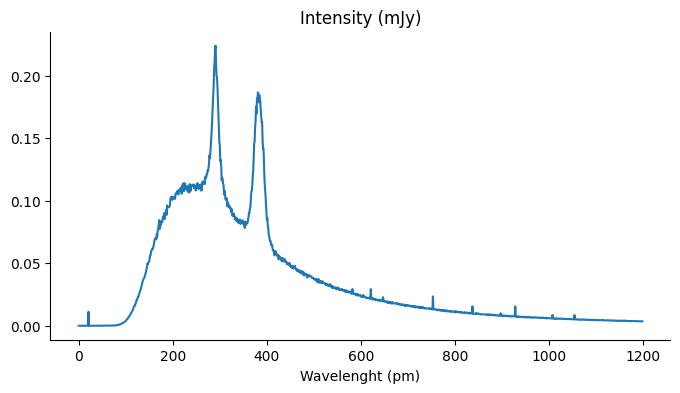

In [ ]:
graph2 = data2['Intensity (mJy)'].plot(kind='line', figsize=(8, 4), title='Intensity (mJy)', xlabel="Wavelenght (pm)")
plt.gca().spines[['top', 'right']].set_visible(False)
graph2

In [ ]:
data3 = data2.copy()
k = 0
tol2 = 1.0
while (not (100 < k < 500)) and (k < n-1):
  intensity = data2["Intensity (mJy)"][k]
  intensity_next = data2["Intensity (mJy)"][k+1]
  dx = abs(intensity - intensity_next)
  if dx > tol2*prom_dx:
    data2["Intensity (mJy)"][k+1] = intensity
    n_eliminados += 1
  k+=1
  if k == 100:
    k = 501

<ipython-input-128-27b8948b5963>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2["Intensity (mJy)"][k+1] = intensity


<Axes: title={'center': 'Intensity (mJy)'}, xlabel='Wavelenght (pm)'>

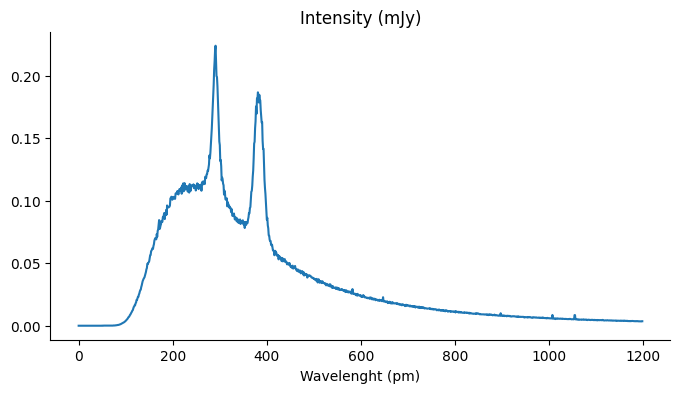

In [ ]:
graph3 = data2['Intensity (mJy)'].plot(kind='line', figsize=(8, 4), title='Intensity (mJy)', xlabel="Wavelenght (pm)")
plt.gca().spines[['top', 'right']].set_visible(False)
graph3

In [ ]:
print(f'1.a) Número de datos eliminados: {n_eliminados}')

1.a) Número de datos eliminados: 25


In [ ]:
def rad_fondo(W, a, b, c):
  return a* np.exp(-b *W) +c

In [ ]:
popt, pcov = curve_fit(rad_fondo,data3['Wavelength (pm)'], data3['Intensity (mJy)'],p0=[100,0.3,0])
a,b,c=popt

In [ ]:
data3["frenado"] = rad_fondo(data3['Wavelength (pm)'],a,b,c)

In [ ]:
data4 = data3.copy()

In [ ]:
data4['Intensity (mJy)'] = data3["Intensity (mJy)"]-data3["frenado"]

<Axes: title={'center': 'Intensity (mJy)'}, xlabel='Wavelenght (pm)'>

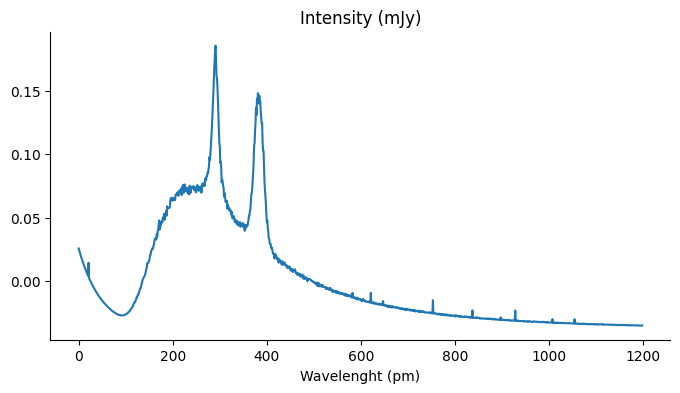

In [ ]:
graph4 = data4['Intensity (mJy)'].plot(kind='line', figsize=(8, 4), title='Intensity (mJy)', xlabel="Wavelenght (pm)")
plt.gca().spines[['top', 'right']].set_visible(False)
graph4